<a href="https://colab.research.google.com/github/JasonLn0711/Talent_vs_Luck_Simulation/blob/main/experiement_talent_vs_luck_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

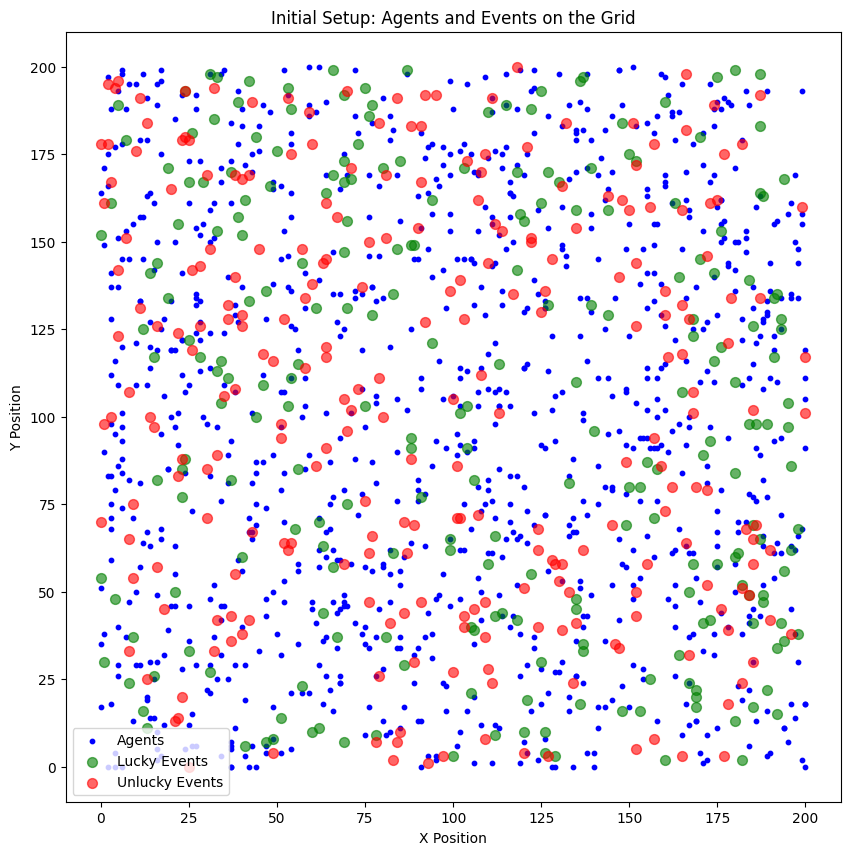

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation setup
grid_size = (201, 201)
num_agents = 1000
num_events = 500
event_probability = 0.5
initial_capital = 10
simulation_years = 40
time_steps = simulation_years * 2  # every 6 months

# Initialize agents
np.random.seed(0)  # for reproducibility
talents = np.random.normal(loc=0.6, scale=0.1, size=num_agents)
talents = np.clip(talents, 0, 1)  # restrict talent to [0, 1]
capitals = np.full(num_agents, initial_capital)

# Initialize dictionary to store capital evolution for each agent
time_series_capitals = {agent: [initial_capital] for agent in range(num_agents)}

# Initialize agent and event positions
agent_positions = np.random.randint(0, grid_size[0], (num_agents, 2))
event_positions = np.random.randint(0, grid_size[0], (num_events, 2))
event_types = np.random.choice(['lucky', 'unlucky'], size=num_events, p=[event_probability, 1-event_probability])

# Separate lucky and unlucky events
lucky_events = event_positions[event_types == 'lucky']
unlucky_events = event_positions[event_types == 'unlucky']

# Plot the initial setup
plt.figure(figsize=(10, 10))
plt.scatter(agent_positions[:, 0], agent_positions[:, 1], color='blue', s=10, label='Agents')
plt.scatter(lucky_events[:, 0], lucky_events[:, 1], color='green', s=50, alpha=0.6, label='Lucky Events')
plt.scatter(unlucky_events[:, 0], unlucky_events[:, 1], color='red', s=50, alpha=0.6, label='Unlucky Events')
plt.title('Initial Setup: Agents and Events on the Grid')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid(False)
plt.show()


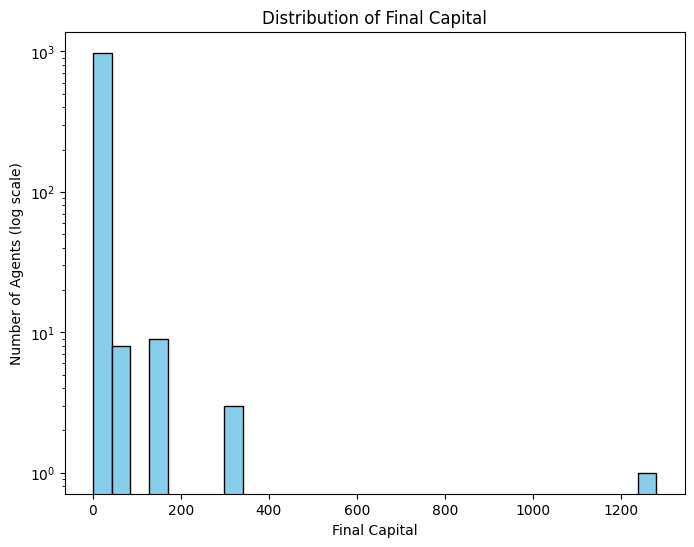

In [45]:
# Define the simulation function
def run_simulation():
    global event_positions, capitals
    for step in range(time_steps):
        # Move events randomly
        moves = np.random.randint(-1, 2, event_positions.shape)
        event_positions = (event_positions + moves) % grid_size[0]  # ensure events stay within grid

        # Check interactions between agents and events
        for i, (x, y) in enumerate(event_positions):
            # Find agents at the same location as event
            agent_indices = np.where((agent_positions == [x, y]).all(axis=1))[0]
            for agent_index in agent_indices:
                if event_types[i] == 'lucky':
                    # Double capital with probability proportional to talent
                    if np.random.rand() < talents[agent_index]:
                        capitals[agent_index] *= 2
                else:  # unlucky event
                    # Halve capital regardless of talent
                    capitals[agent_index] /= 2

        # Record the capital evolution for each agent at this time step
        for agent in range(num_agents):
            time_series_capitals[agent].append(capitals[agent])

# run_simulation() function is defined as in previous simulation code
run_simulation()

# Plot the distribution of final capital
plt.figure(figsize=(8, 6))
plt.hist(capitals, bins=30, color='skyblue', edgecolor='black', log=True)
plt.title("Distribution of Final Capital")
plt.xlabel("Final Capital")
plt.ylabel("Number of Agents (log scale)")
plt.show()


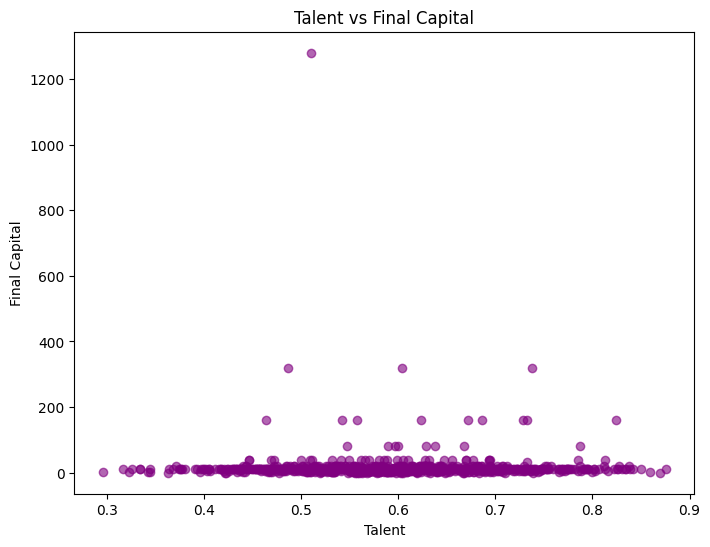

In [46]:
# Plot Talent vs Final Capital after simulation
plt.figure(figsize=(8, 6))
plt.scatter(talents, capitals, color='purple', alpha=0.6)
plt.title("Talent vs Final Capital")
plt.xlabel("Talent")
plt.ylabel("Final Capital")
plt.show()


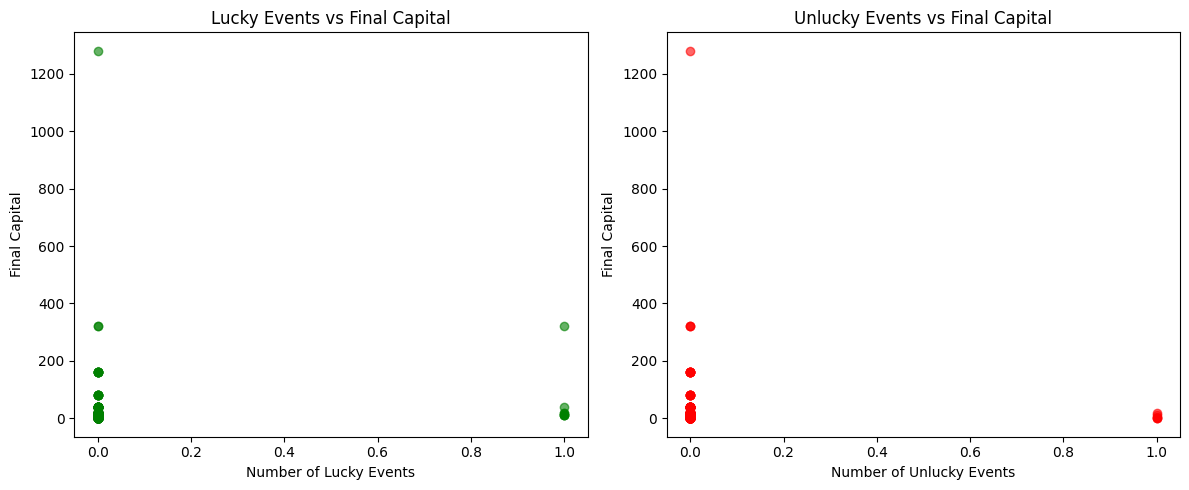

In [47]:
# Arrays to store lucky/unlucky counts per agent
lucky_counts = np.zeros(num_agents)
unlucky_counts = np.zeros(num_agents)

# Modify run_simulation to track lucky/unlucky counts (assume this code snippet is part of the simulation)
for i, (x, y) in enumerate(event_positions):
    agent_indices = np.where((agent_positions == [x, y]).all(axis=1))[0]
    for agent_index in agent_indices:
        if event_types[i] == 'lucky':
            lucky_counts[agent_index] += 1
        else:
            unlucky_counts[agent_index] += 1

# Plot lucky/unlucky events vs capital
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(lucky_counts, capitals, color='green', alpha=0.6)
plt.title("Lucky Events vs Final Capital")
plt.xlabel("Number of Lucky Events")
plt.ylabel("Final Capital")

plt.subplot(1, 2, 2)
plt.scatter(unlucky_counts, capitals, color='red', alpha=0.6)
plt.title("Unlucky Events vs Final Capital")
plt.xlabel("Number of Unlucky Events")
plt.ylabel("Final Capital")

plt.tight_layout()
plt.show()


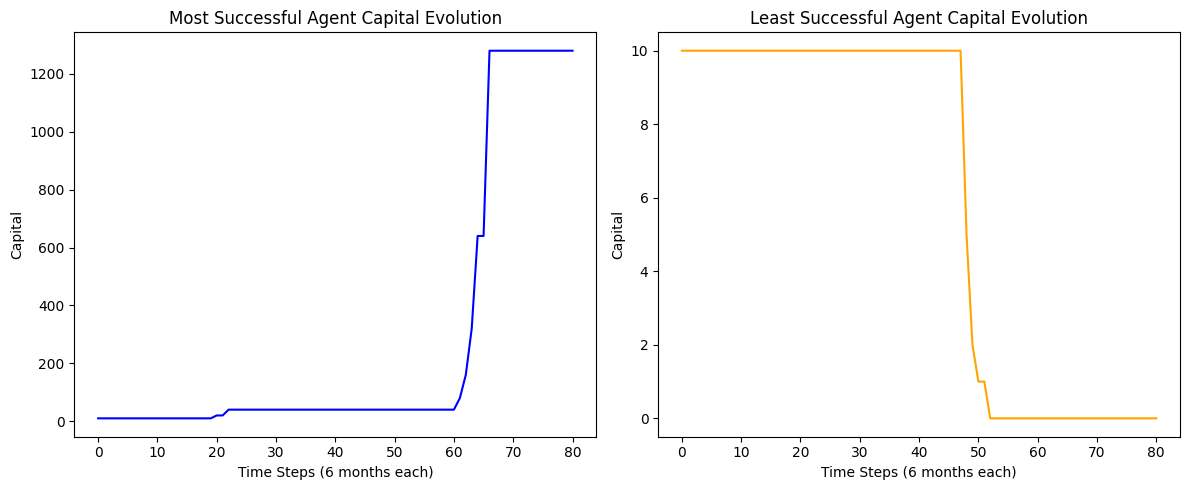

In [48]:
# The capital evolution is recorded during run_simulation()
# time_series_capitals is a dictionary with keys as agent indices and values as lists of capital over time

most_successful_idx = np.argmax(capitals)
least_successful_idx = np.argmin(capitals)

# Plot evolution of capital for most and least successful agents
plt.figure(figsize=(12, 5))

# Most successful agent
plt.subplot(1, 2, 1)
plt.plot(time_series_capitals[most_successful_idx], color='blue')
plt.title("Most Successful Agent Capital Evolution")
plt.xlabel("Time Steps (6 months each)")
plt.ylabel("Capital")

# Least successful agent
plt.subplot(1, 2, 2)
plt.plot(time_series_capitals[least_successful_idx], color='orange')
plt.title("Least Successful Agent Capital Evolution")
plt.xlabel("Time Steps (6 months each)")
plt.ylabel("Capital")

plt.tight_layout()
plt.show()


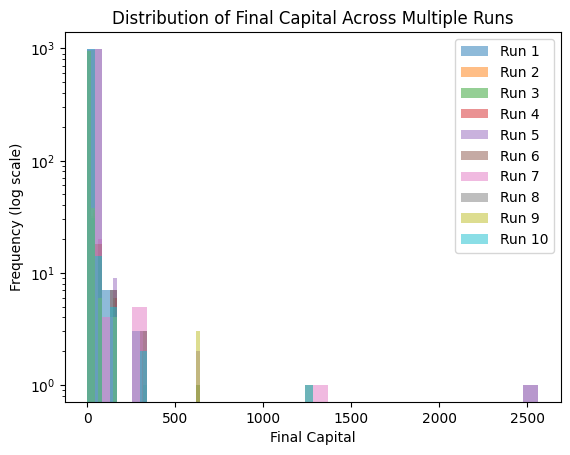

In [49]:
# Parameters for multiple runs
num_runs = 10  # Number of simulation runs. My initial setup was 100 times, but it took too long to get the result.
capitals_multi_run = []  # List to store final capital distribution for each run

# Define a modified simulation function for multiple runs
def run_multiple_simulations():
    global event_positions, capitals, agent_positions
    for run in range(num_runs):
        # Reinitialize capital and positions for each run
        capitals = np.full(num_agents, initial_capital)
        agent_positions = np.random.randint(0, grid_size[0], (num_agents, 2))
        event_positions = np.random.randint(0, grid_size[0], (num_events, 2))
        event_types = np.random.choice(['lucky', 'unlucky'], size=num_events, p=[event_probability, 1-event_probability])

        # Initialize a new time_series_capitals dictionary for each run
        time_series_capitals = {agent: [initial_capital] for agent in range(num_agents)}

        # Run the simulation for the current run
        for step in range(time_steps):
            # Move events randomly
            moves = np.random.randint(-1, 2, event_positions.shape)
            event_positions = (event_positions + moves) % grid_size[0]  # keep within grid bounds

            # Check interactions between agents and events
            for i, (x, y) in enumerate(event_positions):
                # Find agents at the same location as event
                agent_indices = np.where((agent_positions == [x, y]).all(axis=1))[0]
                for agent_index in agent_indices:
                    if event_types[i] == 'lucky':
                        # Double capital with probability proportional to talent
                        if np.random.rand() < talents[agent_index]:
                            capitals[agent_index] *= 2
                    else:  # unlucky event
                        # Halve capital regardless of talent
                        capitals[agent_index] /= 2

            # Record the capital evolution for each agent at this time step
            for agent in range(num_agents):
                time_series_capitals[agent].append(capitals[agent])

        # Store the final capitals from this run into capitals_multi_run
        capitals_multi_run.append(list(capitals))

# Run the multiple simulations
run_multiple_simulations()

# Plot distribution of capitals from a few runs
for i, run_capitals in enumerate(capitals_multi_run[:10]):  # plot first 10 runs as example to show
    plt.hist(run_capitals, bins=30, alpha=0.5, label=f'Run {i+1}', log=True)

plt.title("Distribution of Final Capital Across Multiple Runs")
plt.xlabel("Final Capital")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.show()


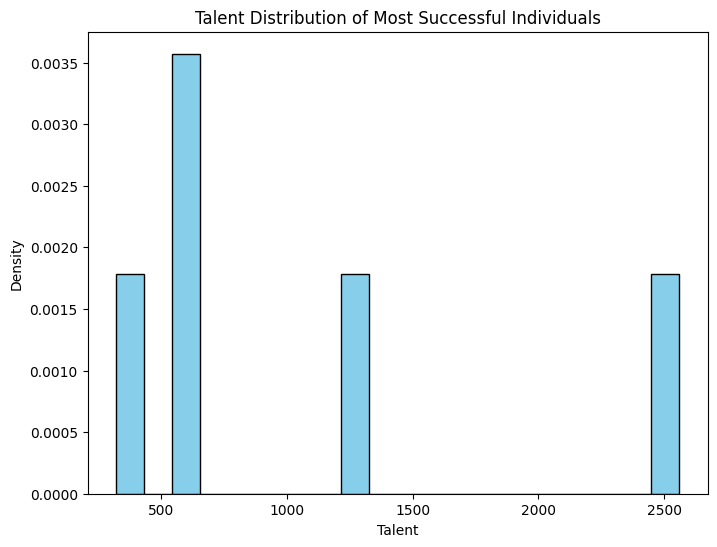

In [50]:
# Select the top performers from each run
top_talents = [np.max(run_capitals) for run_capitals in capitals_multi_run]

plt.figure(figsize=(8, 6))
plt.hist(top_talents, bins=20, color='skyblue', edgecolor='black', density=True)
plt.title("Talent Distribution of Most Successful Individuals")
plt.xlabel("Talent")
plt.ylabel("Density")
plt.show()


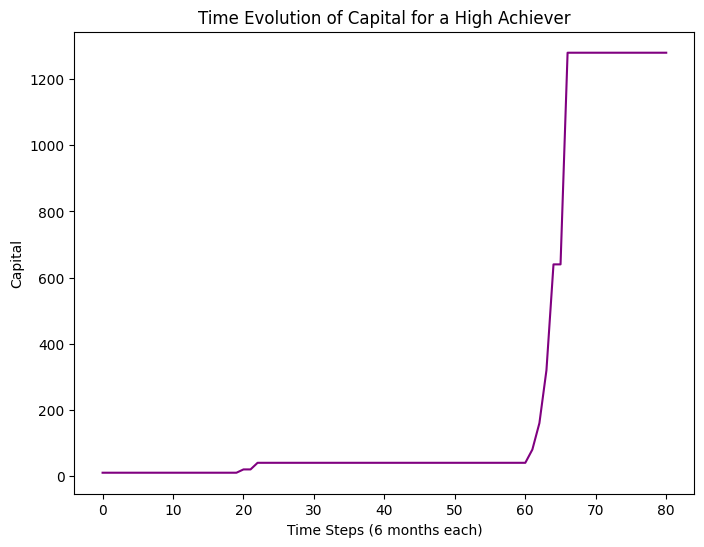

In [51]:
# For the individual with max capital, plot their time series path
plt.figure(figsize=(8, 6))
plt.plot(time_series_capitals[most_successful_idx], color='purple')
plt.title("Time Evolution of Capital for a High Achiever")
plt.xlabel("Time Steps (6 months each)")
plt.ylabel("Capital")
plt.show()
